### Practical example : Must Known Techniques for text preprocessing in NLP

In [1]:
import numpy as np
import pandas as pd
import re
import string
import math


Now we will load data and perform some basic preprocessing to see the data.

 So, we are going to use Email spam data to demonstrate each technique and clean the data. The dataset contains 5730 unique email and a label column indicating mail is span or Ham which is the target variable on which based on the content we can classify the mails.

In [2]:
data = pd.read_csv('emails.csv', usecols=['spam','text'])
data.rename(columns={'spam':'class'},inplace=True)
data['label'] = np.where(data['class']==1,'spam','ham')
data.drop_duplicates(inplace=True)

In [3]:
data

,text,class,label
0,Subject: naturally irresistible your corporate...,1,ham
1,Subject: the stock trading gunslinger fanny i...,1,ham
2,Subject: unbelievable new homes made easy im ...,1,ham
3,Subject: 4 color printing special request add...,1,ham
4,"Subject: do not have money , get software cds ...",1,ham
...,...,...,...
5725,Subject: re : research and development charges...,0,ham
5726,"Subject: re : receipts from visit jim , than...",0,ham
5727,Subject: re : enron case study update wow ! a...,0,ham
5728,"Subject: re : interest david , please , call...",0,ham


Now we will start with the techniques for text preprocessing and clean the data which is ready to build a machine learning model. let us see the first mail and when we will apply the text cleaning technique we will observe the changes to the first mail.

In [4]:
data['text'][0]

"Subject: naturally irresistible your corporate identity  lt is really hard to recollect a company : the  market is full of suqgestions and the information isoverwhelminq ; but a good  catchy logo , stylish statlonery and outstanding website  will make the task much easier .  we do not promise that havinq ordered a iogo your  company will automaticaily become a world ieader : it isguite ciear that  without good products , effective business organization and practicable aim it  will be hotat nowadays market ; but we do promise that your marketing efforts  will become much more effective . here is the list of clear  benefits : creativeness : hand - made , original logos , specially done  to reflect your distinctive company image . convenience : logo and stationery  are provided in all formats ; easy - to - use content management system letsyou  change your website content and even its structure . promptness : you  will see logo drafts within three business days . affordability : your  ma

We can observe lots of noise at first mail like extra spaces, many hyphen marks « - » , different cases, and many more. let’s get started with studying different techniques.

1) Expand Contractions

Contraction is the shortened form of a word like don’t stands for do not, aren’t stands for are not. Like this, we need to expand this contraction in the text data for better analysis. you can easily get the dictionary of contractions on google or create your own and use the re module to map the contractions.

In [168]:
contractions_dict = {"ain't": "are not","'s":" is","aren't": "are not"}
# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))
def expand_contractions(text,contractions_dict=contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, text)
# Expanding Contractions in the reviews
data['text']=data['text'].apply(lambda x:expand_contractions(x))

In [169]:
data['text'][0]

"Subject: naturally irresistible your corporate identity  lt is really hard to recollect a company : the  market is full of suqgestions and the information isoverwhelminq ; but a good  catchy logo , stylish statlonery and outstanding website  will make the task much easier .  we do not promise that havinq ordered a iogo your  company will automaticaily become a world ieader : it isguite ciear that  without good products , effective business organization and practicable aim it  will be hotat nowadays market ; but we do promise that your marketing efforts  will become much more effective . here is the list of clear  benefits : creativeness : hand - made , original logos , specially done  to reflect your distinctive company image . convenience : logo and stationery  are provided in all formats ; easy - to - use content management system letsyou  change your website content and even its structure . promptness : you  will see logo drafts within three business days . affordability : your  ma

2) Lower Case

If the text is in the same case, it is easy for a machine to interpret the words because the lower case and upper case are treated differently by the machine. for example, words like Ball and ball are treated differently by machine. So, we need to make the text in the same case and the most preferred case is a lower case to avoid such problems.

In [170]:
data['text'] = data['text'].str.lower()#Use .str.lower instead of just .lower
#the code with lambda function 
#data['text'] = data['text'].apply(lambda x:x.str.lower())

we have used a sub-method that takes 3 main parameters, the first is a pattern to search, the second is by which we have to replace, and the third is string or text which we have to change. so we have passed all the punctuation and finds if anyone present then replaces with an empty string. Now if you look at the first mail it will look something like this.



In [171]:
data['text'][0]

"subject: naturally irresistible your corporate identity  lt is really hard to recollect a company : the  market is full of suqgestions and the information isoverwhelminq ; but a good  catchy logo , stylish statlonery and outstanding website  will make the task much easier .  we do not promise that havinq ordered a iogo your  company will automaticaily become a world ieader : it isguite ciear that  without good products , effective business organization and practicable aim it  will be hotat nowadays market ; but we do promise that your marketing efforts  will become much more effective . here is the list of clear  benefits : creativeness : hand - made , original logos , specially done  to reflect your distinctive company image . convenience : logo and stationery  are provided in all formats ; easy - to - use content management system letsyou  change your website content and even its structure . promptness : you  will see logo drafts within three business days . affordability : your  ma

-->You can observe the complete text in lower case

3) Remove punctuations


One of the other text processing techniques is removing punctuations. there are total 32 main punctuations that need to be taken care of. we can directly use the string module with a regular expression to replace any punctuation in text with an empty string. 32 punctuations which string module provide us is listed below.

In [172]:
string.punctuation
#'!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~'

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [173]:
#remove punctuation
data['text'] = data['text'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '' , x))

we have used a sub-method that takes 3 main parameters, the first is a pattern to search, the second is by which we have to replace, and the third is string or text which we have to change. so we have passed all the punctuation and finds if anyone present then replaces with an empty string. Now if you look at the first mail it will look something like this.



In [174]:
data['text'][0]

'subject naturally irresistible your corporate identity  lt is really hard to recollect a company  the  market is full of suqgestions and the information isoverwhelminq  but a good  catchy logo  stylish statlonery and outstanding website  will make the task much easier   we do not promise that havinq ordered a iogo your  company will automaticaily become a world ieader  it isguite ciear that  without good products  effective business organization and practicable aim it  will be hotat nowadays market  but we do promise that your marketing efforts  will become much more effective  here is the list of clear  benefits  creativeness  hand  made  original logos  specially done  to reflect your distinctive company image  convenience  logo and stationery  are provided in all formats  easy  to  use content management system letsyou  change your website content and even its structure  promptness  you  will see logo drafts within three business days  affordability  your  marketing break  through 

4) Remove words containing digits and digits 

Sometimes it happens that words and digits combine are written in the text which creates a problem for machines to understand. hence, We need to remove the words and digits which are combined like game57 or game5ts7. This type of word is difficult to process so better to remove them or replace them with an empty string. we use regular expressions for this. 

The first mail is not having digits but other mails in the dataset contain this problem like mail 4.

In [175]:
data['text'][3]

'subject 4 color printing special  request additional information now  click here  click here for a printable version of our order form  pdf format   phone   626  338  8090 fax   626  338  8102 e  mail  ramsey  goldengraphix  com  request additional information now  click here  click here for a printable version of our order form  pdf format   golden graphix  printing 5110 azusa canyon rd  irwindale  ca 91706 this e  mail message is an advertisement and  or solicitation  '

In [176]:
#remove words and digits
data['text'] = data['text'].apply(lambda x: re.sub(r'\b[0-9]+\b\s*', '',x))


In [177]:
#now observe the changes in the mail.
data['text'][3]

'subject color printing special  request additional information now  click here  click here for a printable version of our order form  pdf format   phone   fax   e  mail  ramsey  goldengraphix  com  request additional information now  click here  click here for a printable version of our order form  pdf format   golden graphix  printing azusa canyon rd  irwindale  ca this e  mail message is an advertisement and  or solicitation  '

5) Remove Stopwords

Stopwords are the most commonly occurring words in a text which do not provide any valuable information. stopwords like they, there, this, where, etc are some of the stopwords.

NLTK library is a common library that is used to remove stopwords and include approximately 180 stopwords which it removes. If we want to add any new word to a set of words then it is easy using the add method.

In our example, we want to remove the subject words from every mail so we will add them to stopwords and HTTP to remove web links.

In [178]:
#remove stopwords
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
stop_words.add('subject')
stop_words.add('http')
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stop_words])
#here we have implemented a custom function that will split each word from the text and check whether it is a stopword or not.
#If not then pass as it is in string and if stopword then removes it.
data['text'] = data['text'].apply(lambda x: remove_stopwords(x))

Now the email text will be smaller because all stopwords will be removed.

In [179]:
#now observe the changes in the mail.
data['text'][3]

'color printing special request additional information click click printable version order form pdf format phone fax e mail ramsey goldengraphix com request additional information click click printable version order form pdf format golden graphix printing azusa canyon rd irwindale ca e mail message advertisement solicitation'

6) Stemming and Lemmatization

Stemming is a process to reduce the word to its root stem for example run, running, runs, runed derived from the same word as run. basically stemming do is remove the prefix or suffix from word like ing, s, es, etc. NLTK library is used to stem the words. The stemming technique is not used for production purposes because it is not so efficient technique and most of the time it stems the unwanted words. So, to solve the problem another technique came into the market as Lemmatization. there are various types of stemming algorithms like porter stemmer, snowball stemmer. Porter stemmer is widely used present in the NLTK library.

In [180]:
#stemming
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])
data["text"] = data["text"].apply(lambda x: stem_words(x))

In [181]:
data["text"][3]

'color print special request addit inform click click printabl version order form pdf format phone fax e mail ramsey goldengraphix com request addit inform click click printabl version order form pdf format golden graphix print azusa canyon rd irwindal ca e mail messag advertis solicit'

Lemmatization is similar to stemming, used to stem the words into root word but differs in working. Actually, Lemmatization is a systematic way to reduce the words into their lemma by matching them with a language dictionary.

In [182]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])
data["text"] = data["text"].apply(lambda text: lemmatize_words(text))

-----> Now observe the difference between both the techniques, it has only stemmed those words which are really required as per Language dictionary.

In [183]:
data["text"][3]

'color print special request addit inform click click printabl version order form pdf format phone fax e mail ramsey goldengraphix com request addit inform click click printabl version order form pdf format golden graphix print azusa canyon rd irwindal ca e mail messag advertis solicit'

7) Remove Extra Spaces

Most of the time text data contain extra spaces or while performing the above preprocessing techniques more than one space is left between the text so we need to control this problem. regular expression library performs well to solve this problem.

In [184]:
data["text"] = data["text"].apply(lambda x: re.sub(' +', ' ', x))

These are the most important text preprocessing techniques that are mostly used while dealing with NLP problems.

## Bag of Words using CountVectorizer

sklearns count vectorizer method which does the following: 
<li>It tokenizes the string(separates the string into individual words) and gives an integer ID to each token.
<li>It counts the occurrence of each of those tokens.
<li>The CountVectorizer method automatically converts all tokenized words to their lower case form . It does this using the lowercase parameter which is by default set to True.
<li>It also ignores all punctuation.
<li>The third parameter to take note of is the stop_words parameter. By setting this parameter value to english, CountVectorizer will automatically ignore all words(from our input text) that are found in the built in list of english stop words in scikit-learn.

#### STEP 1 - Import the sklearn.feature_extraction.text.CountVectorizer method and create an instance of it called 'count_vector'.

In [185]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
corpus=data["text"]
count_vector = CountVectorizer() 

 CountVectorizer() has certain parameters which take care of some preprocessing steps for us. They are:

<li> lowercase = True

The lowercase parameter has a default value of True which converts all of our text to its lower case form.

<li> token_pattern = (?u)\\b\\w\\w+\\b

The token_pattern parameter has a default regular expression value of (?u)\\b\\w\\w+\\b which ignores all punctuation marks and treats them as delimiters, while accepting alphanumeric strings of length greater than or equal to 2, as individual tokens or words.

<li> stop_words

The stop_words parameter, if set to english will remove all words from our document set that match a list of English stop words which is defined in scikit-learn. 

#### STEP 2 - Fit your document dataset to the CountVectorizer object you have created using fit(), and get the list of words which have been categorized as features using the get_feature_names() method.

In [186]:
X = count_vector.fit_transform(corpus).toarray()

In [187]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [188]:
word_count = count_vector.get_feature_names()
print(word_count)

['aa', 'aaa', 'aaaenerfax', 'aadedeji', 'aagraw', 'aal', 'aaldou', 'aaliyah', 'aall', 'aanalysi', 'aaron', 'aawesom', 'ab', 'aba', 'abacha', 'abacu', 'abahi', 'abaixo', 'abandon', 'abargain', 'abarr', 'abattoir', 'abb', 'abba', 'abbestellen', 'abbott', 'abbrevi', 'abc', 'abcsearch', 'abdalla', 'abdallat', 'abdelnour', 'abdul', 'abdulla', 'abdullah', 'abei', 'abel', 'abello', 'aber', 'abernathi', 'abet', 'abey', 'abf', 'abhay', 'abi', 'abid', 'abidjan', 'abiiiti', 'abil', 'abilen', 'abit', 'abitibi', 'abklaeren', 'abl', 'abler', 'abli', 'ablig', 'ablx', 'abn', 'abneg', 'abnorm', 'aboard', 'abolish', 'abondantli', 'abook', 'aborigin', 'aborm', 'abort', 'about', 'aboutthi', 'aboutu', 'aboutvenita', 'aboveground', 'abovenet', 'abovetelefax', 'abqewvbgf', 'abr', 'abraham', 'abram', 'abramov', 'abramowicz', 'abras', 'abreast', 'abreo', 'abridg', 'abroad', 'abscissa', 'abscond', 'absenc', 'absens', 'absent', 'absolut', 'absolv', 'absorb', 'absorbowac', 'absorpt', 'absout', 'abspielt', 'abstra

#### STEP 3 - Create a matrix with the rows being each of the document, and the columns being each word. 

The corresponding (row, column) value is the frequency of occurrence of that word(in the column) in a particular document(in the row). You can do this using the transform() method and passing in the document data set as the argument. The transform() method returns a matrix of numpy integers, you can convert this to an array using toarray(). Call the array 'doc_array'

In [189]:
doc_array =  count_vector.fit_transform(corpus).toarray()
doc_array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

Now we have a clean representation of the documents in terms of the frequency distribution of the words in them. To make it easier to understand our next step is to convert this array into a dataframe and name the columns appropriately.

#### STEP 4 - Convert the array we obtained, loaded into 'doc_array', into a dataframe and set the column names to the word names(which you computed earlier using get_feature_names(). Call the dataframe 'frequency_matrix'.

In [190]:
frequency_matrix = pd.DataFrame(doc_array,columns=count_vector.get_feature_names())
frequency_matrix

,aa,aaa,aaaenerfax,aadedeji,aagraw,aal,aaldou,aaliyah,aall,aanalysi,...,zwzm,zxghlajf,zyban,zyc,zygoma,zymg,zzmacmac,zzn,zzncacst,zzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5692,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5693,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5694,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5695,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##### Hyperparameters of BoW: –

In [191]:
print('Creating the new bag of words...')
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the "CountVectorizer" object, which is scikit-learn's bag of words tool.
vectorizer = CountVectorizer(analyzer = 'word',
                            tokenizer = None,
                            preprocessor = None,
                            stop_words = None,
                            max_features = 10,
                            ngram_range=(1,2),
                            #binary=True,
                            min_df=0.1)#When building the vocabulary ignore terms that have a document  |      frequency strictly lower than the given threshold. This value is also|      called cut-off in the literature.

vectorizer_features = vectorizer.fit_transform(data['text'])

# Numpy arrays are easy to work with, so convert the result to an array
vectorizer_features = vectorizer_features.toarray()
print('Bag of words completed')
new_frequency_matrix = pd.DataFrame(vectorizer_features,columns=vectorizer.get_feature_names())
new_frequency_matrix

Creating the new bag of words...
Bag of words completed


,com,ect,ect ect,enron,hou,hou ect,kaminski,plea,vinc,would
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
5692,0,11,5,5,6,6,3,0,4,1
5693,0,0,0,0,0,0,1,0,3,0
5694,0,4,2,4,2,2,1,1,2,0
5695,0,11,5,0,6,6,5,2,7,0


In [192]:
help(CountVectorizer)

Help on class CountVectorizer in module sklearn.feature_extraction.text:

class CountVectorizer(_VectorizerMixin, sklearn.base.BaseEstimator)
 |  CountVectorizer(*, input='content', encoding='utf-8', decode_error='strict', strip_accents=None, lowercase=True, preprocessor=None, tokenizer=None, stop_words=None, token_pattern='(?u)\\b\\w\\w+\\b', ngram_range=(1, 1), analyzer='word', max_df=1.0, min_df=1, max_features=None, vocabulary=None, binary=False, dtype=<class 'numpy.int64'>)
 |  
 |  Convert a collection of text documents to a matrix of token counts
 |  
 |  This implementation produces a sparse representation of the counts using
 |  scipy.sparse.csr_matrix.
 |  
 |  If you do not provide an a-priori dictionary and you do not use an analyzer
 |  that does some kind of feature selection then the number of features will
 |  be equal to the vocabulary size found by analyzing the data.
 |  
 |  Read more in the :ref:`User Guide <text_feature_extraction>`.
 |  
 |  Parameters
 |  ------

In [193]:
vocab = vectorizer.get_feature_names()
print(vocab)

['com', 'ect', 'ect ect', 'enron', 'hou', 'hou ect', 'kaminski', 'plea', 'vinc', 'would']


In [194]:
import numpy as np

# Sum up the counts of each vocabulary word
dist = np.sum(vectorizer_features, axis=0)

# For each, print the vocabulary word and the number of times it
# appears in the dataset
for tag, count in zip(vocab, dist):
    print(count, tag)

5396 com
11420 ect
4879 ect ect
13283 enron
5575 hou
5225 hou ect
4754 kaminski
5060 plea
8469 vinc
4363 would


## Term Frequency-Inverse Document Frequency (TF-IDF) 

Term Frequency measures how frequently a term occurs in a document.
Since every document is different in length, it is possible that a term would appear much more times in long documents than shorter ones. Thus, the term frequency is often divided by the document length (aka. the total number of terms in the document) as a way of normalization:


  <li> TF(t) = (Number of times term t appears in a document)
  
    
  
Inverse Document Frequency measures how important a term is. While computing TF, all terms are considered equally important.

    
However it is known that certain terms, such as "is", "of", and "that", may appear a lot of times but have little importance. Thus we need to weigh down the frequent terms while scale up the rare ones, by computing the following:

  <li> IDF(t) = log_e(Total number of documents / Number of documents with term t in it).
      
  
  
TF-IDF transform can be defined as the product of the term frequency and the inverse document frequency
TfidfTransformer() takes the raw term frequencies from CountVectorizer as input and transforms them into tf-idfs:

In [195]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [196]:
print('Tfidf ponderations')


# Initialize the "TfidfVectorizer" object.
tfidf_vect = TfidfVectorizer()
X_tfidf = tfidf_vect.fit_transform(data['text'])

# Numpy arrays are easy to work with, so convert the result to an array
vectorizer_features = X_tfidf.toarray()
tfidf_frequency_matrix = pd.DataFrame(vectorizer_features,columns=tfidf_vect.get_feature_names())
tfidf_frequency_matrix

Tfidf ponderations


,aa,aaa,aaaenerfax,aadedeji,aagraw,aal,aaldou,aaliyah,aall,aanalysi,...,zwzm,zxghlajf,zyban,zyc,zygoma,zymg,zzmacmac,zzn,zzncacst,zzzz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5692,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5693,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5694,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5695,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [197]:
help(TfidfVectorizer)

Help on class TfidfVectorizer in module sklearn.feature_extraction.text:

class TfidfVectorizer(CountVectorizer)
 |  TfidfVectorizer(*, input='content', encoding='utf-8', decode_error='strict', strip_accents=None, lowercase=True, preprocessor=None, tokenizer=None, analyzer='word', stop_words=None, token_pattern='(?u)\\b\\w\\w+\\b', ngram_range=(1, 1), max_df=1.0, min_df=1, max_features=None, vocabulary=None, binary=False, dtype=<class 'numpy.float64'>, norm='l2', use_idf=True, smooth_idf=True, sublinear_tf=False)
 |  
 |  Convert a collection of raw documents to a matrix of TF-IDF features.
 |  
 |  Equivalent to :class:`CountVectorizer` followed by
 |  :class:`TfidfTransformer`.
 |  
 |  Read more in the :ref:`User Guide <text_feature_extraction>`.
 |  
 |  Parameters
 |  ----------
 |  input : {'filename', 'file', 'content'}, default='content'
 |      - If `'filename'`, the sequence passed as an argument to fit is
 |        expected to be a list of filenames that need reading to fetc

In [198]:
# get feature names
feature_names = np.array(tfidf_vect.get_feature_names())
sorted_by_idf = np.argsort(tfidf_vect.idf_)
print("Features with lowest idf:\n{}".format(
       feature_names[sorted_by_idf[:10]]))
print("\nFeatures with highest idf:\n{}".format(
       feature_names[sorted_by_idf[-10:]]))

Features with lowest idf:
['plea' 'vinc' 'enron' 'thank' 'cc' 'would' 'kaminski' 'com' 'forward'
 'time']

Features with highest idf:
['pillativan' 'pillciali' 'pilllevitra' 'pillori' 'pillsoma' 'pillultram'
 'pillvalium' 'pillxanax' 'icca' 'lightsourceonlin']


## WordCloud

(-0.5, 799.5, 599.5, -0.5)

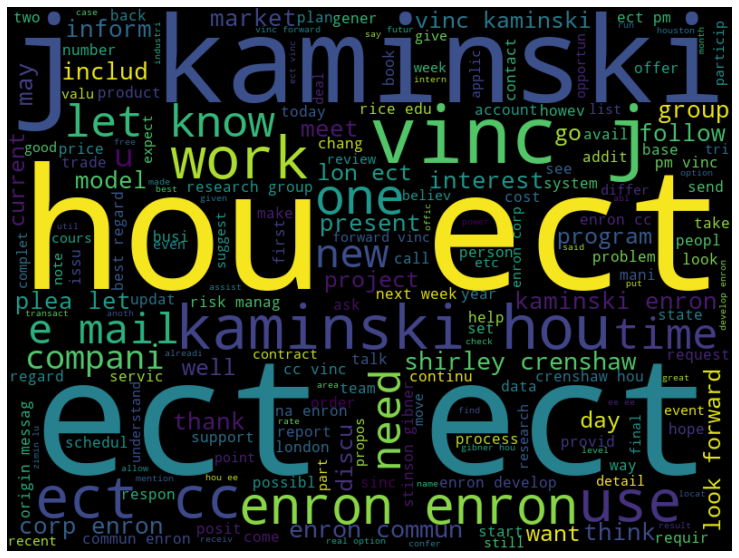

In [199]:
import matplotlib
import pylab as plt

from wordcloud import WordCloud
# Generate a word cloud image
wordcloud = WordCloud(width=800, height=600).generate(" ".join(data['text']))
plt.figure(figsize=(16,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")



Word cloud will show the most frequent words in bigger size, whereas the less frequent words will be written with smaller size. 

Here are some notes regarding the arguments for WordCloud function:


◼️ width/height: You can change the word cloud dimension to your preferred width and height with these.

◼️ random_state: If you don’t this set this to a number of your choice, you are likely to get a slightly different word cloud every time you run the same script on the same input data. By setting this parameter, you ensure reproducibility of the exact same word cloud. You could play around with random numbers until you find the one that results in the word cloud you like.

◼️ background_colour: ‘white’ and ‘black’ are common background colours. If you would like to explore more colours, this may come in handy. Please note that some colours may not work. Hope you will find something you fancy.

◼️ colormap: With this argument, you can set up the colour theme that the words are displayed in. There are many beautiful Matplotlib colormaps to choose from. Some of my favourites are ‘rainbow’, ‘seismic’, ‘Pastel1’ and Pastel2’.

◼️ collocations: Set this to False to ensure that the word cloud doesn’t appear as if it contains any duplicate words. Otherwise, you may see ‘web’, ‘scraping’ and ‘web scraping’ as a collocation in the word cloud, giving an impression that words have been duplicated.

◼️ stopwords: Stopwords are common words which provide little to no value to the meaning of the text. ‘We’, ‘are’ and ‘the’ are examples of stopwords.


There are other arguments that you can also customise. Check out the documentation for more information.

If you want to save the image, WordCloud provides a function to_file

In [200]:
wordcloud.to_file('cloud.png')